# Exercise 14: Trends in IN Snow

In this exercise, we will build on geospatial skills from last week to assemble a dataset of snow observations in Indiana from a global dataset of meteorological observations.  The aim will be to ask whether there are trends in snow in IN.  This exercise will involve automatically downloading data from an external source.

The source dataset is: https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily

In [1]:
""" Import libraries. """
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs
import geopandas as gpd
import pandas as pd
from tqdm.notebook import tqdm # for a progress bar; you'll need to install tqdm and ipywidgets
import scipy
import datetime as dt

In [2]:
""" Load the inventory file. """

# set the inventory file
file_url = "https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt"

# load the inventory file into a pandas dataframe
snow_df = pd.read_fwf(
    file_url, 
    header=None, 
    names=['station', 'latitude', 'longitude', 'data', 'year_start', 'year_end'], 
    parse_dates=[4, 5],
    sep='\s'
    )

snow_df.head()

,station,latitude,longitude,data,year_start,year_end
0,ACW00011604,17.1167,-61.7833,TMAX,1949-01-01,1949-01-01
1,ACW00011604,17.1167,-61.7833,TMIN,1949-01-01,1949-01-01
2,ACW00011604,17.1167,-61.7833,PRCP,1949-01-01,1949-01-01
3,ACW00011604,17.1167,-61.7833,SNOW,1949-01-01,1949-01-01
4,ACW00011604,17.1167,-61.7833,SNWD,1949-01-01,1949-01-01


In [3]:
snow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742280 entries, 0 to 742279
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   station     742280 non-null  object        
 1   latitude    742280 non-null  float64       
 2   longitude   742280 non-null  float64       
 3   data        742280 non-null  object        
 4   year_start  742280 non-null  datetime64[ns]
 5   year_end    742280 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 34.0+ MB


In [4]:
""" Convert the inventory dataframe to a geopandas dataframe. """
snow_gdf = gpd.GeoDataFrame(
    snow_df, 
    geometry=gpd.points_from_xy(snow_df.longitude, snow_df.latitude),
    crs='EPSG:4326'
    )

snow_gdf.head()

,station,latitude,longitude,data,year_start,year_end,geometry
0,ACW00011604,17.1167,-61.7833,TMAX,1949-01-01,1949-01-01,POINT (-61.78330 17.11670)
1,ACW00011604,17.1167,-61.7833,TMIN,1949-01-01,1949-01-01,POINT (-61.78330 17.11670)
2,ACW00011604,17.1167,-61.7833,PRCP,1949-01-01,1949-01-01,POINT (-61.78330 17.11670)
3,ACW00011604,17.1167,-61.7833,SNOW,1949-01-01,1949-01-01,POINT (-61.78330 17.11670)
4,ACW00011604,17.1167,-61.7833,SNWD,1949-01-01,1949-01-01,POINT (-61.78330 17.11670)


<Axes: >

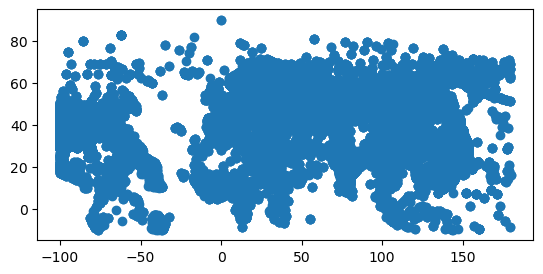

In [10]:
""" Find stations that have at least 50 years of data. """

# find stations that have at least 50 years of data
snow_gdf['length'] = snow_gdf['year_end'].dt.year - snow_gdf['year_start'].dt.year + 1
snow_50_gdf = snow_gdf[snow_gdf['length']>=50]

# plot the stations that have at least 50 years of SNOW data
snow_50_gdf.plot()

<Axes: >

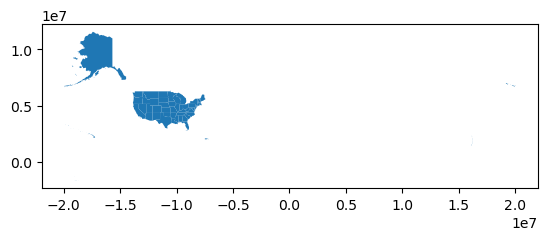

In [8]:
""" Load the state boundary shapefile. """

# set the path to the shapefile
state_shapefile_path = "https://github.com/taobrienlbl/advanced_earth_science_data_analysis/raw/09188e9e6a0cf230f8473c0ae95d2e1b9079df3a/lessons/13_geospatial_intro/data/tl_2012_us_state.zip"

# load the state boundary shapefile
state_gdf = gpd.read_file(state_shapefile_path)
state_gdf.head()

# plot the state boundary shapefile
state_gdf.plot()

<Axes: >

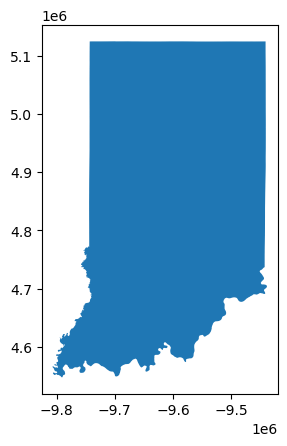

In [9]:
""" Extract the IN row. """
# extract the IN row
IN_gdf = state_gdf[state_gdf.STUSPS=='IN']
IN_gdf.head()

# plot the IN boundary
IN_gdf.plot()

In [12]:
""" Use the IN boundary to clip the snow. """

# convert the in boundary to the same projection as the snow
IN_gdf_proj = IN_gdf.to_crs(snow_50_gdf.crs)

# clip the snow to the IN boundary
snow_50_gdf_clipped = gpd.clip(snow_50_gdf, IN_gdf_proj)

# isolate this to just the SNOW variable
snow_50_gdf_clipped.drop(snow_50_gdf_clipped[snow_50_gdf_clipped['data']!='SNOW'].index, inplace=True)

snow_50_gdf_clipped.head()

C:\Users\CRH\AppData\Local\Temp\ipykernel_35712\3440267501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow_50_gdf_clipped.drop(snow_50_gdf_clipped[snow_50_gdf_clipped['data']!='SNOW'].index, inplace=True)


,station,latitude,longitude,data,year_start,year_end,geometry,length
461778,USC00121256,37.8994,-86.7072,SNOW,1972-01-01,2023-01-01,POINT (-86.70720 37.89940),52
462127,USC00121998,37.8333,-87.6667,SNOW,1925-01-01,1975-01-01,POINT (-87.66670 37.83330),51
462399,USC00122725,38.0000,-86.0000,SNOW,1926-01-01,1975-01-01,POINT (-86.00000 38.00000),50
465295,USC00128698,37.9531,-86.7747,SNOW,1937-01-01,2012-01-01,POINT (-86.77470 37.95310),76
464125,USC00126001,37.9286,-87.8956,SNOW,1893-01-01,2023-01-01,POINT (-87.89560 37.92860),131


In [16]:
snow_50_gdf_clipped.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 135 entries, 461778 to 465890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   station     135 non-null    object        
 1   latitude    135 non-null    float64       
 2   longitude   135 non-null    float64       
 3   data        135 non-null    object        
 4   year_start  135 non-null    datetime64[ns]
 5   year_end    135 non-null    datetime64[ns]
 6   geometry    135 non-null    geometry      
 7   length      135 non-null    int32         
dtypes: datetime64[ns](2), float64(2), geometry(1), int32(1), object(2)
memory usage: 9.0+ KB


In [27]:
snow_50_gdf_clipped

,station,latitude,longitude,data,year_start,year_end,geometry,length
461778,USC00121256,37.8994,-86.7072,SNOW,1972-01-01,2023-01-01,POINT (-86.70720 37.89940),52
462127,USC00121998,37.8333,-87.6667,SNOW,1925-01-01,1975-01-01,POINT (-87.66670 37.83330),51
462399,USC00122725,38.0000,-86.0000,SNOW,1926-01-01,1975-01-01,POINT (-86.00000 38.00000),50
465295,USC00128698,37.9531,-86.7747,SNOW,1937-01-01,2012-01-01,POINT (-86.77470 37.95310),76
464125,USC00126001,37.9286,-87.8956,SNOW,1893-01-01,2023-01-01,POINT (-87.89560 37.92860),131
...,...,...,...,...,...,...,...,...
465486,USC00128999,41.5114,-87.0378,SNOW,1893-01-01,2005-01-01,POINT (-87.03780 41.51140),113
463562,USC00124837,41.6117,-86.7297,SNOW,1897-01-01,2023-01-01,POINT (-86.72970 41.61170),127
462793,USC00123418,41.5575,-85.8825,SNOW,1914-01-01,2023-01-01,POINT (-85.88250 41.55750),110
712785,USW00014848,41.7072,-86.3164,SNOW,1893-01-01,2023-01-01,POINT (-86.31640 41.70720),131


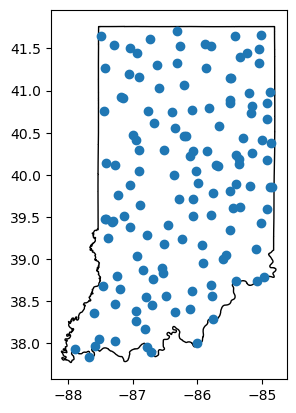

In [15]:
# plot the clipped snow and the state boundary
fig, ax = plt.subplots()

IN_gdf_proj.plot(ax=ax, facecolor='None', edgecolor='black')

snow_50_gdf_clipped.plot(ax=ax)

plt.show()

In [21]:
""" Set the URL template for the GHCN-Daily data. """

folder_url = "https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/"

# create a function to load the GHCN-Daily data for a station
def load_data(folder_url, station_name) -> pd.DataFrame:

    file_url = folder_url + station_name + ".csv"

    GHCN_df = pd.read_csv(file_url, parse_dates=['DATE'])

    return GHCN_df

# test on the first station
station_name = 'USC00121256'
GHCN_df = load_data(folder_url, station_name)

In [22]:
GHCN_df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,MDPR,MDPR_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,USC00121256,1972-07-01,37.8994,-86.7072,122.5,"CANNELTON, IN US",0.0,",,6,",NaN,NaN,...,NaN,NaN,178.0,",,6,",NaN,NaN,NaN,NaN,NaN,NaN
1,USC00121256,1972-07-02,37.8994,-86.7072,122.5,"CANNELTON, IN US",13.0,",,6,",NaN,NaN,...,NaN,NaN,200.0,",I,6,",NaN,NaN,NaN,NaN,NaN,NaN
2,USC00121256,1972-07-03,37.8994,-86.7072,122.5,"CANNELTON, IN US",356.0,",,6,",NaN,NaN,...,NaN,NaN,211.0,",,6,",NaN,NaN,NaN,NaN,NaN,NaN
3,USC00121256,1972-07-04,37.8994,-86.7072,122.5,"CANNELTON, IN US",0.0,"T,,6,",NaN,NaN,...,NaN,NaN,200.0,",,6,",NaN,NaN,NaN,NaN,NaN,NaN
4,USC00121256,1972-07-05,37.8994,-86.7072,122.5,"CANNELTON, IN US",30.0,",,6,",NaN,NaN,...,NaN,NaN,144.0,",,6,",NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
GHCN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16863 entries, 0 to 16862
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          16863 non-null  object        
 1   DATE             16863 non-null  datetime64[ns]
 2   LATITUDE         16863 non-null  float64       
 3   LONGITUDE        16863 non-null  float64       
 4   ELEVATION        16863 non-null  float64       
 5   NAME             16863 non-null  object        
 6   PRCP             16778 non-null  float64       
 7   PRCP_ATTRIBUTES  16778 non-null  object        
 8   SNOW             10280 non-null  float64       
 9   SNOW_ATTRIBUTES  10280 non-null  object        
 10  SNWD             9700 non-null   float64       
 11  SNWD_ATTRIBUTES  9700 non-null   object        
 12  TMAX             10098 non-null  float64       
 13  TMAX_ATTRIBUTES  10098 non-null  object        
 14  TMIN             10036 non-null  float

In [26]:
""" Download data for all the stations. """
GHCN_snow_list = []
bad_station_list = []

for station in snow_50_gdf_clipped['station']:
    try:
        GHCN_df = load_data(folder_url, station)
        GHCN_snow_list.append(GHCN_df)
    except:
        bad_station_list.append(station)
        continue


C:\Users\CRH\AppData\Local\Temp\ipykernel_35712\2014675506.py:10: DtypeWarning: Columns (19,23,39,41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  GHCN_df = pd.read_csv(file_url, parse_dates=['DATE'])
C:\Users\CRH\AppData\Local\Temp\ipykernel_35712\2014675506.py:10: DtypeWarning: Columns (17,19,21,27,31,33,35,37,39,41,43,45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  GHCN_df = pd.read_csv(file_url, parse_dates=['DATE'])
C:\Users\CRH\AppData\Local\Temp\ipykernel_35712\2014675506.py:10: DtypeWarning: Columns (19,21,25,27,29,33,45,47,49,53) have mixed types. Specify dtype option on import or set low_memory=False.
  GHCN_df = pd.read_csv(file_url, parse_dates=['DATE'])
C:\Users\CRH\AppData\Local\Temp\ipykernel_35712\2014675506.py:10: DtypeWarning: Columns (17,35) have mixed types. Specify dtype option on import or set low_memory=False.
  GHCN_df = pd.read_csv(file_url, parse_dates=['DATE'])
C:\Users\CRH\AppData\Local\Tem

In [34]:
GHCN_snow_list[0][['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'SNOW']]

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,SNOW
0,USC00121256,1972-07-01,37.8994,-86.7072,122.5,NaN
1,USC00121256,1972-07-02,37.8994,-86.7072,122.5,NaN
2,USC00121256,1972-07-03,37.8994,-86.7072,122.5,NaN
3,USC00121256,1972-07-04,37.8994,-86.7072,122.5,NaN
4,USC00121256,1972-07-05,37.8994,-86.7072,122.5,NaN
...,...,...,...,...,...,...
16858,USC00121256,2023-09-29,37.8994,-86.7072,122.5,0.0
16859,USC00121256,2023-09-30,37.8994,-86.7072,122.5,0.0
16860,USC00121256,2023-11-28,37.8994,-86.7072,122.5,NaN
16861,USC00121256,2023-11-29,37.8994,-86.7072,122.5,NaN


In [35]:
""" Combine the data into a single dataframe. """

# empty dataframe
GHCN_snow_df = GHCN_snow_list[0][['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'SNOW']].copy()

# combine the data into a single dataframe
for GHCN_df in GHCN_snow_list[1:]:
    GHCN_snow_df = pd.concat([GHCN_snow_df, GHCN_df[['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'SNOW']]])

# save the data to a CSV file with today's date
GHCN_snow_df.info()
#GHCN_snow_df.to_csv("GHCN_IN_snow.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3657982 entries, 0 to 18978
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   STATION    object        
 1   DATE       datetime64[ns]
 2   LATITUDE   float64       
 3   LONGITUDE  float64       
 4   ELEVATION  float64       
 5   SNOW       float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 195.4+ MB


In [37]:
""" Convert the data to a geopandas dataframe. """

# parse the date column

# convert the data to a geopandas dataframe
GHCN_snow_gdf = gpd.GeoDataFrame(
    GHCN_snow_df, 
    geometry=gpd.points_from_xy(GHCN_snow_df.LONGITUDE, GHCN_snow_df.LATITUDE),
    crs='EPSG:4326'
    )

GHCN_snow_gdf.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,SNOW,geometry
0,USC00121256,1972-07-01,37.8994,-86.7072,122.5,NaN,POINT (-86.70720 37.89940)
1,USC00121256,1972-07-02,37.8994,-86.7072,122.5,NaN,POINT (-86.70720 37.89940)
2,USC00121256,1972-07-03,37.8994,-86.7072,122.5,NaN,POINT (-86.70720 37.89940)
3,USC00121256,1972-07-04,37.8994,-86.7072,122.5,NaN,POINT (-86.70720 37.89940)
4,USC00121256,1972-07-05,37.8994,-86.7072,122.5,NaN,POINT (-86.70720 37.89940)


In [43]:
""" Pick a date and plot the snow """
# pick a date
target_date = dt.datetime(2011, 2, 1)
GHCN_snow_gdf_target = GHCN_snow_gdf[GHCN_snow_gdf['DATE']==target_date]

GHCN_snow_gdf_target.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 80 entries, 12235 to 41363
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    80 non-null     object        
 1   DATE       80 non-null     datetime64[ns]
 2   LATITUDE   80 non-null     float64       
 3   LONGITUDE  80 non-null     float64       
 4   ELEVATION  80 non-null     float64       
 5   SNOW       52 non-null     float64       
 6   geometry   80 non-null     geometry      
dtypes: datetime64[ns](1), float64(4), geometry(1), object(1)
memory usage: 5.0+ KB


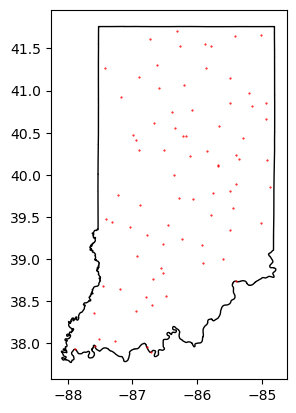

In [44]:
fig, ax = plt.subplots()

IN_gdf_proj.plot(ax=ax, facecolor='None', edgecolor='black')

GHCN_snow_gdf_target.plot(ax=ax, marker='.', color='red', markersize=1)

# plot the snow
plt.show()

## Breakpoint

If you want to spend class time on your final project, here would be a good place to end the exercise.  Otherwise, I encourage you to keep going.

In [ ]:
""" Calculate the total snow each year."""
# sum by year

In [ ]:
""" Calculate the trend in snow. """

# calculate the trend in snow

# get the lat/lon for each station from the inventory

# convert the dataframe to a geodataframe

# rename the columns


In [ ]:
""" Plot the trend in snow. """


# plot the trends, using the trend magnitude as the color and marker size

# plot the state boundary


